# Data Loading and Preprocessing

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cars = pd.read_csv('CarPrice.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


CarName feature has different models of cars which does not give valuable information, since car models do not repeat often. Thus, we only leave company names. We apply the the split to this feature

In [115]:
cars['CarName'] = cars['CarName'].transform(lambda x : x.split(' ')[0])

In [116]:
#Typos in some company names
cars.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [117]:
#First, words should be in lower case 
cars['CarName'] = cars['CarName'].str.lower()

#Seconds, replace with correct company names
cars['CarName'].replace('vw','volkswagen',inplace=True)
cars['CarName'].replace('vokswagen','volkswagen',inplace=True)
cars['CarName'].replace('porcshce','porsche',inplace=True)
cars['CarName'].replace('maxda', 'mazda',inplace=True)
cars['CarName'].replace('toyouta', 'toyota',inplace=True)

In [118]:
#Everything should be correct now
cars.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

'CarName' feature data transformation for higher correlation rate

Still, previous iteration of feature selection showed that having this many car brand names for "CarName" feature greatly decreased its correlation with 'price'. We decidedto group cars brands depending on their average price from high to medium to low ones. 

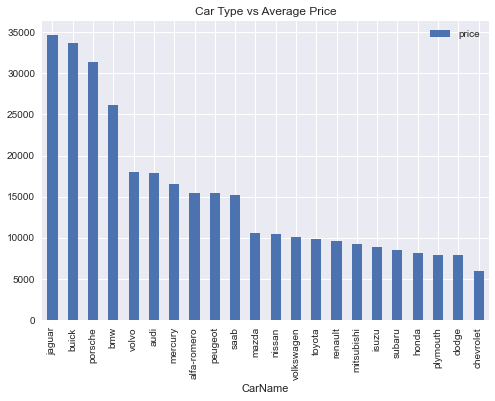

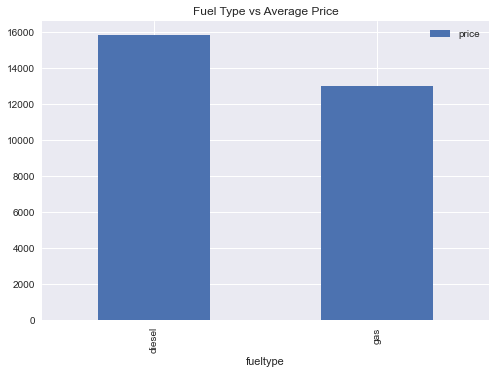

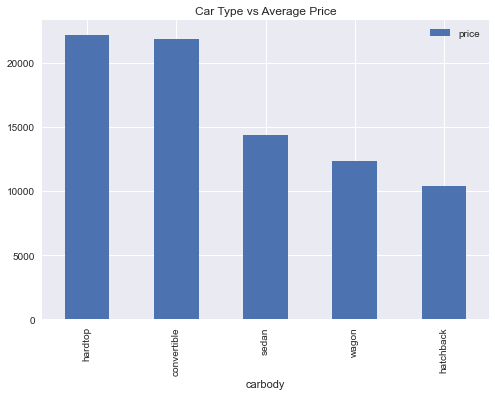

<Figure size 1800x432 with 0 Axes>

<Figure size 1800x432 with 0 Axes>

In [119]:
df = pd.DataFrame(cars.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False)) 
df.plot.bar() 
plt.title('Fuel Type vs Average Price') 
plt.show() 
 
df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False)) 
df.plot.bar() 
plt.title('Car Type vs Average Price') 
plt.show() 
plt.figure(figsize=(25, 6))

First group = 'jaguar', 'buick', 'porsche', 'bmw'
Second group = 'volvo', 'audi', 'mercury', 'alfa-romero', 'peugeot', 'saab'
Third group = 'mazda', 'nissan', 'volkswagen', 'toyota', 'renault', 'mitsubishi', 'isuzu', 'subaru', 'honda', 'plymouth', 'dodge', 'chevrolet'

In [120]:
#First group
cars['CarName'].replace('jaguar','First',inplace=True)
cars['CarName'].replace('buick','First',inplace=True)
cars['CarName'].replace('porsche','First',inplace=True)
cars['CarName'].replace('bmw', 'First',inplace=True)

#Second group
cars['CarName'].replace('volvo', 'Second',inplace=True)
cars['CarName'].replace('audi','Second',inplace=True)
cars['CarName'].replace('mercury','Second',inplace=True)
cars['CarName'].replace('alfa-romero','Second',inplace=True)
cars['CarName'].replace('peugeot', 'Second',inplace=True)
cars['CarName'].replace('saab', 'Second',inplace=True)

#Third group
cars['CarName'].replace('nissan','Third',inplace=True)
cars['CarName'].replace('volkswagen','Third',inplace=True)
cars['CarName'].replace('dodge','Third',inplace=True)
cars['CarName'].replace('mazda', 'Third',inplace=True)
cars['CarName'].replace('toyota', 'Third',inplace=True)
cars['CarName'].replace('renault','Third',inplace=True)
cars['CarName'].replace('chevrolet','Third',inplace=True)
cars['CarName'].replace('mitsubishi','Third',inplace=True)
cars['CarName'].replace('isuzu', 'Third',inplace=True)
cars['CarName'].replace('subaru', 'Third',inplace=True)
cars['CarName'].replace('honda', 'Third',inplace=True)
cars['CarName'].replace('plymouth', 'Third',inplace=True)

In [121]:
cars.CarName.unique()

array(['Second', 'First', 'Third'], dtype=object)

In [122]:
#Features from the dataset with numberical values
carsn = cars[["symboling", "wheelbase", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "carlength", "carwidth", "carheight", "curbweight", "price"]]
carsn.head()

,symboling,wheelbase,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carlength,carwidth,carheight,curbweight,price
0,3,88.6,130,3.47,2.68,9.0,111,5000,21,27,168.8,64.1,48.8,2548,13495.0
1,3,88.6,130,3.47,2.68,9.0,111,5000,21,27,168.8,64.1,48.8,2548,16500.0
2,1,94.5,152,2.68,3.47,9.0,154,5000,19,26,171.2,65.5,52.4,2823,16500.0
3,2,99.8,109,3.19,3.40,10.0,102,5500,24,30,176.6,66.2,54.3,2337,13950.0
4,2,99.4,136,3.19,3.40,8.0,115,5500,18,22,176.6,66.4,54.3,2824,17450.0


In [123]:
#Features from the dataset with categoricla data
carsl = cars[['fuelsystem', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'enginelocation']]
carsl.head()

,fuelsystem,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,enginelocation
0,mpfi,Second,gas,std,two,convertible,rwd,dohc,four,front
1,mpfi,Second,gas,std,two,convertible,rwd,dohc,four,front
2,mpfi,Second,gas,std,two,hatchback,rwd,ohcv,six,front
3,mpfi,Second,gas,std,four,sedan,fwd,ohc,four,front
4,mpfi,Second,gas,std,four,sedan,4wd,ohc,five,front


In [124]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
cars['CarName']= label_encoder.fit_transform(cars['CarName'])
cars['fueltype']= label_encoder.fit_transform(cars['fueltype'])
cars['fuelsystem']= label_encoder.fit_transform(cars['fuelsystem'])
cars['aspiration']= label_encoder.fit_transform(cars['aspiration'])
cars['doornumber']= label_encoder.fit_transform(cars['doornumber'])
cars['carbody']= label_encoder.fit_transform(cars['carbody'])
cars['drivewheel']= label_encoder.fit_transform(cars['drivewheel'])
cars['enginetype']= label_encoder.fit_transform(cars['enginetype'])
cars['cylindernumber']= label_encoder.fit_transform(cars['cylindernumber'])
cars['enginelocation']= label_encoder.fit_transform(cars['enginelocation'])

In [125]:
#Features from the dataset with categoricla data turned into numerical values
carslton = cars[['fuelsystem', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'enginelocation']]
carslton.head()

,fuelsystem,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,enginelocation
0,5,1,1,0,1,0,2,0,2,0
1,5,1,1,0,1,0,2,0,2,0
2,5,1,1,0,1,2,2,5,3,0
3,5,1,1,0,0,3,1,3,2,0
4,5,1,1,0,0,3,0,3,1,0


In [126]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,1,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [127]:
cars.shape

(205, 26)

We do not include the first feature of the dataset which is simply car id's. The last feature 'price' is the end

In [128]:
x_data = cars.iloc[:, 1:25]
y_data = cars.iloc[:, 25]

In [129]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=100, test_size=0.2)
print('x_train_shape: ' + str(x_train.shape) + '\nx_test_shape: ' + str(x_test.shape)\
       + '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape))

x_train_shape: (164, 24)
x_test_shape: (41, 24)
y_train_shape: (164,)
y_test_shape: (41,)


<AxesSubplot:>

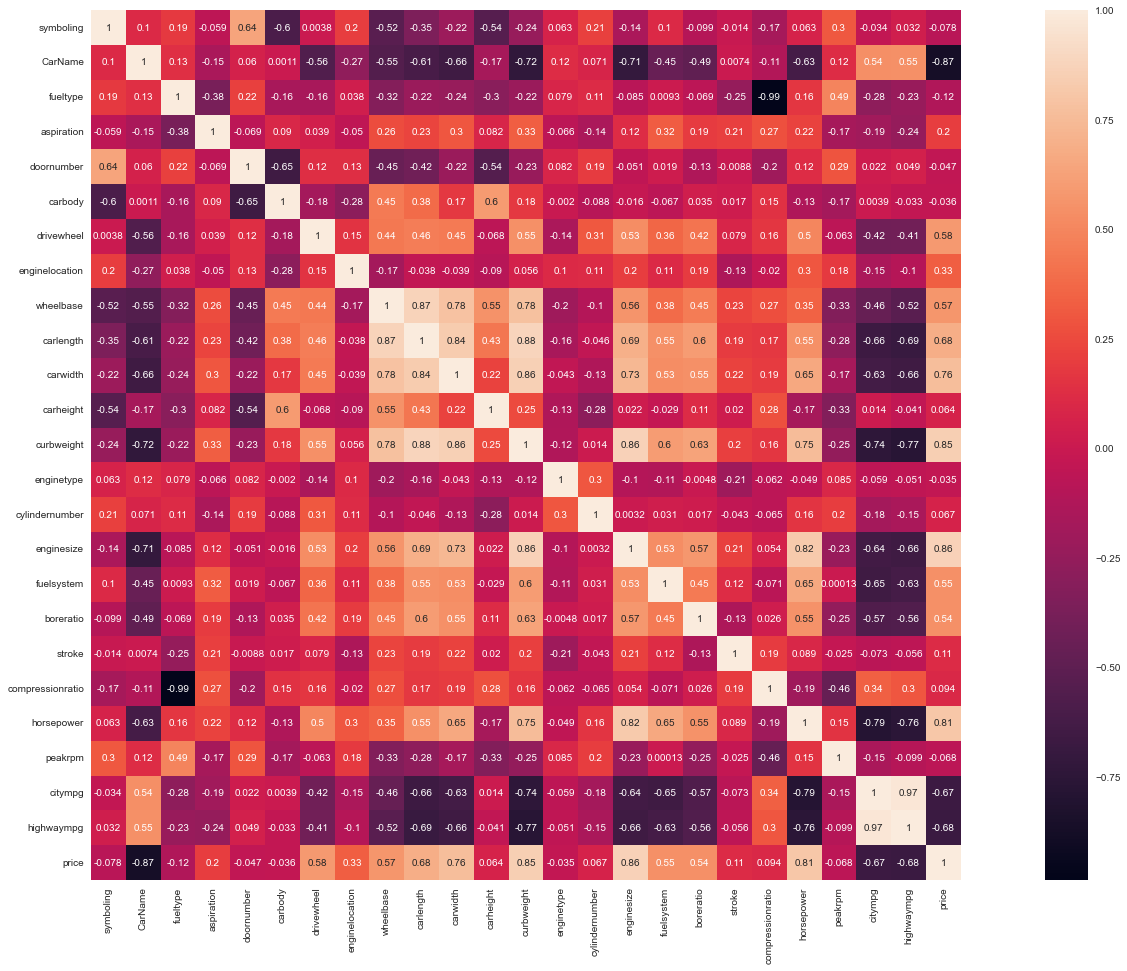

In [130]:
import seaborn as sns

train = pd.concat([x_train, y_train], axis=1)
fig, ax = plt.subplots(figsize=(30,16))
sns.heatmap(train.corr(), annot=True, square=True, ax=ax)

Since we have 26 feature in total, it would be better to choose valuable features to avoid high dimensionalty. Features with high correlation rate can be selected. To conclude, we chose the features as you can see in the cell below, which do have correlation rate => 0.3.

In practice, brand plays a crucial part in car's price range. We did try to change the feature so that it would have more correlation with price in the dataset. However, were only able to increase to -0.87.   

In [131]:
carse = cars [['drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'stroke', 'aspiration']]
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,1,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [132]:
from sklearn.preprocessing import StandardScaler

#Normalization of data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)


The scaler object holds any information that the standardization algorithm implemented in StandardScaler class extracts from the data. The fit() method returns the scaler object itself and modfies that in place (i.e., stores the parameters estimated from the data).

Text(0, 0.5, '$\\hat{y}$ (Predicted price)')

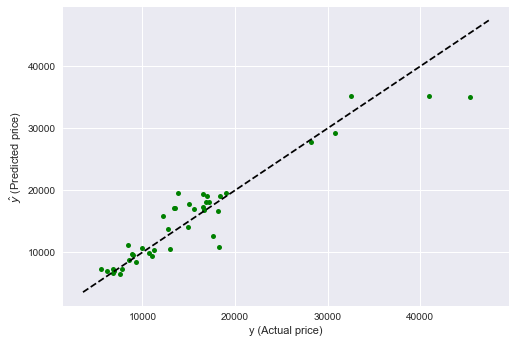

In [133]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
y_test_predicted = lr.predict(x_test_scaled)
plt.plot(y_test, y_test_predicted, 'g.', markersize=10)
lim_left, lim_right = plt.xlim()
plt.plot([lim_left, lim_right], [lim_left, lim_right], '--k')
plt.xlabel("y (Actual price)")
plt.ylabel("$\hat{y}$ (Predicted price)")

In [134]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('R^2 (coefficient of determination) is {:.3f}'.format(r2_score(y_test, y_test_predicted)))
print('MSE (Mean Square Error) is {:.3f}'.format(mean_squared_error(y_test, y_test_predicted)))
print('MAE (Mean Absolute Error) is {:.3f}'.format(mean_absolute_error(y_test, y_test_predicted)))

R^2 (coefficient of determination) is 0.887
MSE (Mean Square Error) is 8731780.179
MAE (Mean Absolute Error) is 2025.605


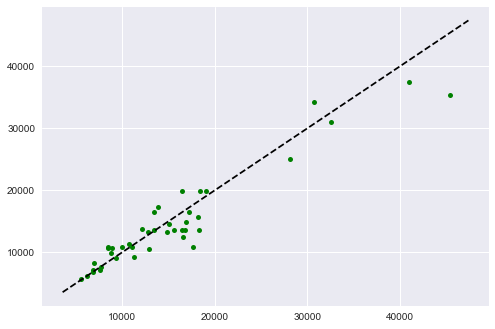

In [135]:
from sklearn.neighbors import KNeighborsRegressor as KNN  
plt.style.use('seaborn') 
knn = KNN(n_neighbors=3) 
knn.fit(x_train_scaled, y_train) 
y_test_predictions = knn.predict(x_test_scaled) 
plt.plot(y_test, y_test_predictions, 'g.', markersize=10) 
lim_left, lim_right = plt.xlim() 
plt.plot([lim_left, lim_right], [lim_left, lim_right], '--k')

In [136]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
 
print('R^2 (coefficient of determination) is {:.3f}'.format(r2_score(y_test, y_test_predictions))) 
print('MSE (Mean Square Error) is {:.3f}'.format(mean_squared_error(y_test, y_test_predictions))) 
print('MAE (Mean Absolute Error) is {:.3f}'.format(mean_absolute_error(y_test, y_test_predictions)))

R^2 (coefficient of determination) is 0.897
MSE (Mean Square Error) is 7940194.865
MAE (Mean Absolute Error) is 2034.882


# After presentation modifications

During the presentation, one of the issued we reported were MSE and MAE values being very large. We supposed it was caused due to car prices which are also respectively large. Here, we also applied normalization to target variables, and it solved the problem.  

In [86]:
#Normalization of target variables
scaler = StandardScaler()
scaler.fit(y_train.array.reshape(164, 1))
y_train_scaled = scaler.transform(y_train.array.reshape(164, 1))
y_test_scaled = scaler.transform(y_test.array.reshape(41, 1))

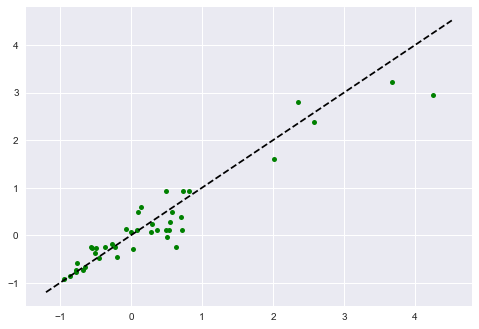

In [137]:
from sklearn.neighbors import KNeighborsRegressor as KNN  
plt.style.use('seaborn') 
knn = KNN(n_neighbors=3) 
knn.fit(x_train_scaled, y_train_scaled) 
y_test_predictions_knn = knn.predict(x_test_scaled) 
plt.plot(y_test_scaled, y_test_predictions_knn, 'g.', markersize=10) 
lim_left, lim_right = plt.xlim() 
plt.plot([lim_left, lim_right], [lim_left, lim_right], '--k')

In [138]:
print('R^2 (coefficient of determination) is {:.3f}'.format(r2_score(y_test_scaled, y_test_predictions_knn))) 
print('MSE (Mean Square Error) is {:.3f}'.format(mean_squared_error(y_test_scaled, y_test_predictions_knn))) 
print('MAE (Mean Absolute Error) is {:.3f}'.format(mean_absolute_error(y_test_scaled, y_test_predictions_knn)))

R^2 (coefficient of determination) is 0.897
MSE (Mean Square Error) is 0.135
MAE (Mean Absolute Error) is 0.265


We also impelemented Random Forest for regression model. 

In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


min_samples_split = [5]
min_samples_leaf = [5]
max_depth = [15]
n_estimators = [100]
max_features = [None]

rf = RandomForestRegressor()
param = {'n_estimators': n_estimators,
         'max_features': max_features,
         'max_depth': max_depth,
         'min_samples_split': min_samples_split,
         'min_samples_leaf': min_samples_leaf}

rfr = RandomizedSearchCV(estimator = rf,
                        param_distributions = param,
                        scoring ='neg_mean_squared_error',
                        n_iter = 1,
                        cv = 5,
                        verbose = 2,
                        random_state = 42,
                        n_jobs = 1)

rfr.fit(x_train_scaled, y_train)
y_test_predictions_rf = rfr.predict(x_test_scaled)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s


In [140]:
print('R^2 (coefficient of determination) is {:.3f}'.format(r2_score(y_test, y_test_predictions_rf))) 
print('MSE (Mean Square Error) is {:.3f}'.format(mean_squared_error(y_test, y_test_predictions_rf))) 
print('MAE (Mean Absolute Error) is {:.3f}'.format(mean_absolute_error(y_test, y_test_predictions_rf)))

R^2 (coefficient of determination) is 0.901
MSE (Mean Square Error) is 7605727.620
MAE (Mean Absolute Error) is 1777.529


Here, the reason for using unscaled target data is that some function here only permit one-dimensional series. However, we know that this large number ar only due to unscaled variables, and otherwise they would be very low. 

Text(0, 0.5, '$\\hat{y}$ (Predicted price)')

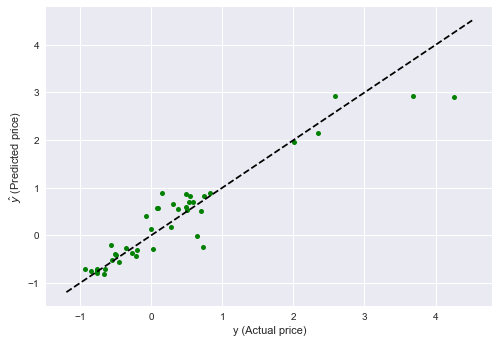

In [141]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()
lr.fit(x_train_scaled,y_train_scaled)
y_test_predicted = lr.predict(x_test_scaled)
plt.plot(y_test_scaled, y_test_predicted, 'g.', markersize=10)
lim_left, lim_right = plt.xlim()
plt.plot([lim_left, lim_right], [lim_left, lim_right], '--k')
plt.xlabel("y (Actual price)")
plt.ylabel("$\hat{y}$ (Predicted price)")

In [142]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('R^2 (coefficient of determination) is {:.3f}'.format(r2_score(y_test_scaled, y_test_predicted)))
print('MSE (Mean Square Error) is {:.3f}'.format(mean_squared_error(y_test_scaled, y_test_predicted)))
print('MAE (Mean Absolute Error) is {:.3f}'.format(mean_absolute_error(y_test_scaled, y_test_predicted)))

R^2 (coefficient of determination) is 0.887
MSE (Mean Square Error) is 0.149
MAE (Mean Absolute Error) is 0.264


In [1]:
def doubleHashing(value, m, p):
    hashTable = [None] * m
    for i in range(m):
        key = value[i] % m
        j = 0;     #Iteration number
        while hashTable[key] is not None:
            steps = p - (value[i] % p)
            key = (key + steps*j) % m
            j = j+1;
            if(j == 20):
                break;
        hashTable[key] = value[i]
    if(m < len(value)):
        print("Hash Table is full! Maximum number of keys is exceeded!")
    print(hashTable)


values = [20, 34, 45, 23, 56, 37, 55, 74, 66, 54, 10, 67, 99, 12, 39]
doubleHashing(values, 13, 11)

HashTable is full! Maximum number of keys is exceeded!
[10, 66, 54, 55, 56, 99, 45, 20, 34, 74, 23, 37, 67]
